In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
import datetime
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from mlxtend.evaluate import permutation_test

In [6]:
def getCity(x):
    return x[0]
def setTime(x):
    val = x
    if len(x) == 4:
        pass
    elif len(x) == 3:
        val = '0' + val
    elif len(x) == 2:
        val = '00' + val
    elif len(x) == 1:
        val = '000'+ val
    val = val[:2]+':'+val[:-2]
    return val

def set_new_sleep(x):
    return x[:2]+ ':' + x[:-2]

### Topic 3. Distributions


### Hypothesis 1 : In winter months, different airlines have similar weather delay  distribution (KS Test)

In [2]:
delays_2015 = pd.read_csv('flight_delay_prediction/Data/flight_delays_2017.csv', delimiter = ',')
delays_2015.head()

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CARRIER_NAME
0,2017,1,2,1/2/17,AA,1767,LAS,"Las Vegas, NV",Nevada,DFW,...,155,121,1,1055,0,0,0,0,26,American Airlines
1,2017,1,4,1/4/17,AA,1767,LAS,"Las Vegas, NV",Nevada,DFW,...,152,114,1,1055,0,0,0,0,42,American Airlines
2,2017,1,6,1/6/17,AA,1767,LAS,"Las Vegas, NV",Nevada,DFW,...,170,123,1,1055,62,0,7,0,0,American Airlines
3,2017,1,16,1/16/17,AA,1767,LAS,"Las Vegas, NV",Nevada,DFW,...,0,0,1,1055,0,0,0,0,0,American Airlines
4,2017,1,24,1/24/17,AA,1767,LAS,"Las Vegas, NV",Nevada,DFW,...,182,121,1,1055,0,0,15,0,0,American Airlines


In [7]:
delays_2015['ORIGIN_CITY'] = delays_2015['ORIGIN_CITY_NAME'].str.split(',').apply(getCity)

In [8]:
ua = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'Delta Airlines') & (delays_2015['MONTH'] == 1)]
ua_delay = ua.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()

aa = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'American Airlines') & (delays_2015['MONTH'] == 1)]
aa_delay = aa.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()

jb = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'JetBlue Airlines') & (delays_2015['MONTH'] == 1)]
jb_delay = jb.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()

ua_dec = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'Delta Airlines') & (delays_2015['MONTH'] == 12)]
ua_delay_dec = ua_dec.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()
ua_delay_dec = ua_delay_dec.drop(ua_delay_dec.index[[0,14,30]])

aa_dec = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'American Airlines') & (delays_2015['MONTH'] == 12)]
aa_delay_dec = aa_dec.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()
aa_delay_dec = aa_delay_dec.drop(aa_delay_dec.index[[0,14,30]])

jb_dec = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'JetBlue Airlines') & (delays_2015['MONTH'] == 12)]
jb_delay_dec = jb_dec.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()
jb_delay_dec = jb_delay_dec.drop(jb_delay_dec.index[[0,14,30]])

ua_nov = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'Delta Airlines') & (delays_2015['MONTH'] == 11)]
ua_delay_nov = ua_nov.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()
ua_delay_nov = ua_delay_nov.drop(ua_delay_nov.index[0])


aa_nov = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'American Airlines') & (delays_2015['MONTH'] == 11)]
aa_delay_nov = aa_nov.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()

jb_nov = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'JetBlue Airlines') & (delays_2015['MONTH'] == 11)]
jb_delay_nov = jb_nov.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()
jb_delay_nov = jb_delay_nov.drop(jb_delay_nov.index[0])

ua_feb = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'Delta Airlines') & (delays_2015['MONTH'] == 2)]
ua_delay_feb = ua_feb.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()

aa_feb = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'American Airlines') & (delays_2015['MONTH'] == 2)]
aa_delay_feb = aa_feb.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()

jb_feb = delays_2015.loc[(delays_2015['ORIGIN_CITY'] == 'New York') & (delays_2015['CARRIER_NAME'] == 'JetBlue Airlines') & (delays_2015['MONTH'] == 2)]
jb_delay_feb = jb_feb.groupby(['FL_DATE'])['WEATHER_DELAY'].mean().reset_index()

In [9]:
print('January: United and American, K statistic: ', ks_2samp(ua_delay['WEATHER_DELAY'],aa_delay['WEATHER_DELAY']))
print('Critical value: 0.24170')

January: United and American, K statistic:  Ks_2sampResult(statistic=0.06451612903225812, pvalue=0.9999998162888041)
Critical value: 0.24170


In [10]:
print('January: United and Jetblue, K statistic: ', ks_2samp(ua_delay['WEATHER_DELAY'],jb_delay['WEATHER_DELAY']))
print('Critical value: 0.24170')

January: United and Jetblue, K statistic:  Ks_2sampResult(statistic=0.16129032258064513, pvalue=0.7781601639693188)
Critical value: 0.24170


In [11]:
print('January: JetBlue and American, K statistic: ', ks_2samp(jb_delay['WEATHER_DELAY'],aa_delay['WEATHER_DELAY']))
print('Critical value: 0.24170')

January: JetBlue and American, K statistic:  Ks_2sampResult(statistic=0.16129032258064524, pvalue=0.7781601639693182)
Critical value: 0.24170


In [12]:
print('February: United and American, K statistic: ', ks_2samp(ua_delay_feb['WEATHER_DELAY'],aa_delay_feb['WEATHER_DELAY']))
print('Critical value: 0.24170')

February: United and American, K statistic:  Ks_2sampResult(statistic=0.1071428571428572, pvalue=0.9950300789783744)
Critical value: 0.24170


In [13]:
print('February: United and JetBlue, K statistic: ', ks_2samp(ua_delay_feb['WEATHER_DELAY'],jb_delay_feb['WEATHER_DELAY']))
print('Critical value: 0.24170')

February: United and JetBlue, K statistic:  Ks_2sampResult(statistic=0.1428571428571429, pvalue=0.9168051856555133)
Critical value: 0.24170


In [14]:
print('February: JetBlue and American, K statistic: ', ks_2samp(jb_delay_feb['WEATHER_DELAY'],aa_delay_feb['WEATHER_DELAY']))
print('Critical value: 0.24170')

February: JetBlue and American, K statistic:  Ks_2sampResult(statistic=0.1785714285714285, pvalue=0.7198213976490382)
Critical value: 0.24170


In [15]:
print('November: United and American, K statistic: ', ks_2samp(ua_delay_nov['WEATHER_DELAY'],aa_delay_nov['WEATHER_DELAY']))
print('Critical value: 0.24170')

November: United and American, K statistic:  Ks_2sampResult(statistic=0.06896551724137934, pvalue=0.9999994140797756)
Critical value: 0.24170


In [16]:
print('November: United and JetBlue, K statistic: ', ks_2samp(ua_delay_nov['WEATHER_DELAY'],jb_delay_nov['WEATHER_DELAY']))
print('Critical value: 0.24170')

November: United and JetBlue, K statistic:  Ks_2sampResult(statistic=0.06896551724137934, pvalue=0.9999994140797756)
Critical value: 0.24170


In [17]:
print('November: JetBlue and American, K statistic: ', ks_2samp(jb_delay_nov['WEATHER_DELAY'],aa_delay_nov['WEATHER_DELAY']))
print('Critical value: 0.24170')

November: JetBlue and American, K statistic:  Ks_2sampResult(statistic=0.10344827586206906, pvalue=0.9961173878360126)
Critical value: 0.24170


In [18]:
print('December: United and American, K statistic: ', ks_2samp(ua_delay_dec['WEATHER_DELAY'],aa_delay_dec['WEATHER_DELAY']))
print('Critical value: 0.24170')

December: United and American, K statistic:  Ks_2sampResult(statistic=0.1785714285714286, pvalue=0.7198213976490374)
Critical value: 0.24170


In [19]:
print('December: United and JetBlue, K statistic: ', ks_2samp(ua_delay_dec['WEATHER_DELAY'],jb_delay_dec['WEATHER_DELAY']))
print('Critical value: 0.24170')

December: United and JetBlue, K statistic:  Ks_2sampResult(statistic=0.1428571428571429, pvalue=0.9168051856555133)
Critical value: 0.24170


In [20]:
print('December: American and JetBlue, K statistic: ', ks_2samp(aa_delay_dec['WEATHER_DELAY'],jb_delay_dec['WEATHER_DELAY']))
print('Critical value: 0.24170')

December: American and JetBlue, K statistic:  Ks_2sampResult(statistic=0.1071428571428572, pvalue=0.9950300789783744)
Critical value: 0.24170


### Hypothesis 2 : In winter months, different airlines have similar weather delay distribution(Permutation Test)

In [22]:
p_value = permutation_test(ua_delay['WEATHER_DELAY'], aa_delay['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value1 = permutation_test(jb_delay['WEATHER_DELAY'], aa_delay['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value2 = permutation_test(jb_delay['WEATHER_DELAY'], ua_delay['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)

In [23]:
print('Critical value: 0.05')
print('January: ', p_value, ' and ', p_value1, ' and ', p_value2)

Critical value: 0.05
January:  0.339  and  0.7718  and  0.4296


In [24]:
p_value3 = permutation_test(ua_delay_feb['WEATHER_DELAY'], aa_delay_feb['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value4 = permutation_test(jb_delay_feb['WEATHER_DELAY'], aa_delay_feb['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value5 = permutation_test(jb_delay_feb['WEATHER_DELAY'], ua_delay_feb['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)

In [25]:
print('Critical value: 0.05')
print('February: ', p_value3, ' and ', p_value4, ' and ', p_value5)

Critical value: 0.05
February:  0.9552  and  0.8883  and  0.2845


In [26]:
p_value6 = permutation_test(ua_delay_nov['WEATHER_DELAY'], aa_delay_nov['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value7 = permutation_test(jb_delay_nov['WEATHER_DELAY'], aa_delay_nov['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value8 = permutation_test(jb_delay_nov['WEATHER_DELAY'], ua_delay_nov['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)

In [27]:
print('Critical value: 0.05')
print('November: ', p_value6, ' and ', p_value7, ' and ', p_value8)

Critical value: 0.05
November:  0.5048  and  0.4231  and  0.8766


In [28]:
p_value9 = permutation_test(ua_delay_dec['WEATHER_DELAY'], aa_delay_dec['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value10 = permutation_test(jb_delay_dec['WEATHER_DELAY'], aa_delay_dec['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
p_value11 = permutation_test(jb_delay_dec['WEATHER_DELAY'], ua_delay_dec['WEATHER_DELAY'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)

In [29]:
print('Critical value: 0.05')
print('December: ', p_value9, ' and ', p_value10, ' and ', p_value11)

Critical value: 0.05
December:  0.5445  and  0.4098  and  0.689


### Hypothesis 3 : Departure delays at airports are normally distributed

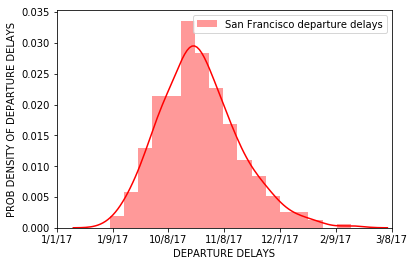

In [3]:
sfo = delays_2015.loc[(delays_2015['ORIGIN'] == 'SFO')]
jfk = delays_2015.loc[(delays_2015['ORIGIN'] == 'JFK')]
lax = delays_2015.loc[(delays_2015['ORIGIN'] == 'LAX')]

sfo = sfo.groupby(['FL_DATE'])['DEP_DELAY'].mean().reset_index()
jfk = jfk.groupby(['FL_DATE'])['DEP_DELAY'].mean().reset_index()
lax = lax.groupby(['FL_DATE'])['DEP_DELAY'].mean().reset_index()


g = sns.distplot(sfo['DEP_DELAY'], color='red')
plt.legend(['San Francisco departure delays'])
plt.plot(sfo['DEP_DELAY'], 'r')
plt.xlabel('DATE')
plt.ylabel('DEPARTURE DELAY PROBABILITY DISTRIBUTION')

xlabels = [sfo.loc[i,'FL_DATE'] for i in range(0, len(sfo),30)]
plt.xlim([0,120])
g.set(xticklabels=xlabels)
plt.ylabel('PROB DENSITY OF DEPARTURE DELAYS')
plt.xlabel('DEPARTURE DELAYS')
plt.show()

In [17]:
### USing MLE and MME
mean_mme = sum(sfo['DEP_DELAY'])/len(sfo)
var_mme = ((sum((sfo['DEP_DELAY'])**2))/len(sfo['DEP_DELAY'])) - (mean_mme**2)
print ("mean_mme:", mean_mme)
print ("var_mme:", var_mme)

mean_mme: 51.24164286772673
var_mme: 201.25956013000632


In [18]:
## CI
mean_mme + (1.96) * np.sqrt(np.var(sfo['DEP_DELAY']))

79.04737476234588

In [19]:
## CI
mean_mme - (1.96) * np.sqrt(np.var(sfo['DEP_DELAY']))

23.435910973107585

In [ ]:
mean_mle = sum(sfo['DEP_DELAY'])/len(sfo)
var_mle = ((sum(sfo['DEP_DELAY'])**2) / len(sfo))  - (mean_mme**2)

In [34]:
std_sfo = (sfo['DEP_DELAY'] - sfo['DEP_DELAY'].mean()) / sfo['DEP_DELAY'].std()
print('Critical value: 0.07', stats.kstest(std_sfo, 'norm'))
print ("We accept the null hypothesis that departure delay of flights from San Fransisco Intl Airport is normally distributed")

Critical value: 0.07 KstestResult(statistic=0.05393655108427531, pvalue=0.3290835992708401)
We accept the null hypothesis that departure delay of flights from San Fransisco Intl Airport is normally distributed


Text(0.5,0,'DEPARTURE DELAYS')

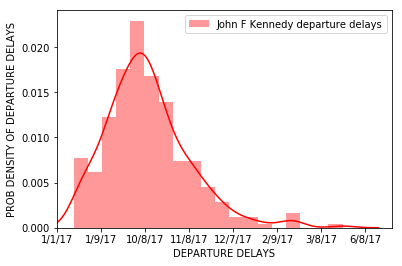

In [35]:
g = sns.distplot(jfk['DEP_DELAY'],color='red')
xlabels = [jfk.loc[i,'FL_DATE'] for i in range(0, len(jfk),30)]
plt.legend(['John F Kennedy departure delays'])
g.set(xticklabels=xlabels)
t = plt.xlim([0,190])
plt.ylabel('PROB DENSITY OF DEPARTURE DELAYS')
plt.xlabel('DEPARTURE DELAYS')

In [37]:
std_ny = (jfk['DEP_DELAY'] - jfk['DEP_DELAY'].mean()) / jfk['DEP_DELAY'].std()
print('Critical value: 0.07', stats.kstest(std_ny, 'norm'))
print ("We reject the null hypothesis that departure delay of flights from John F Kennedy are normally distributed")

Critical value: 0.07 KstestResult(statistic=0.08213069406019458, pvalue=0.031238718335723226)
We reject the null hypothesis that departure delay of flights from John F Kennedy are normally distributed


Text(0.5,0,'DEPARTURE DELAYS')

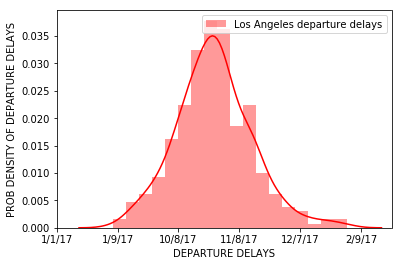

In [38]:
g = sns.distplot(lax['DEP_DELAY'],color='red')
xlabels = [lax.loc[i,'FL_DATE'] for i in range(0, len(lax),30)]
plt.legend(['Los Angeles departure delays'])
g.set(xticklabels=xlabels)
t = plt.xlim([0,110])
plt.ylabel('PROB DENSITY OF DEPARTURE DELAYS')
plt.xlabel('DEPARTURE DELAYS')

In [41]:
std_lax = (lax['DEP_DELAY'] - lax['DEP_DELAY'].mean()) / lax['DEP_DELAY'].std()
print('Critical value: 0.07', stats.kstest(std_lax, 'norm'))
print ("We accept the null hypothesis that departure delay of flights from LAX is normally distributed")

Critical value: 0.07 KstestResult(statistic=0.05193715045910896, pvalue=0.3748095331639696)
We accept the null hypothesis that departure delay of flights from LAX is normally distributed


In [20]:
### USing MLE and MME
mean_mme = sum(lax['DEP_DELAY'])/len(lax)
var_mme = ((sum((lax['DEP_DELAY'])**2))/len(lax['DEP_DELAY'])) - (mean_mme**2)
print ("mean_mme:", mean_mme)
print ("var_mme:", var_mme)

mean_mme: 51.7213590443304
var_mme: 156.65153915647397


In [21]:
mean_mme + (1.96) * np.sqrt(np.var(lax['DEP_DELAY']))

76.25281951498941

In [22]:
mean_mme - (1.96) * np.sqrt(np.var(lax['DEP_DELAY']))

27.18989857367139